In [1]:
# Interactive shell of Ipython is used to execute multiple statements at a time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
%matplotlib inline
import matplotlib.pyplot as plt 
import operator
from wordcloud import WordCloud
import pandas as pd

import re
import os
import tweepy as tw
import spacy
import en_core_web_sm
#nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [29]:
consumer_key= 'xxxx'
consumer_secret= 'xxxx'

access_token= 'xxxx'
access_token_secret= 'xxxx'

bearer_token='xxxx'

In [30]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [57]:
import json

search_term = "Silkboard+traffic -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-08-01').items(100)

tweets

In [58]:
users_locs = [[tweet.user.screen_name,tweet.text, tweet.user.location,tweet.created_at] for tweet in tweets]

tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', 'tweet',"location",'time'])
tweet_text

## other values that are available in tweet
## dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id',
## 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
## 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
## 'retweeted', 'lang'])

,user,tweet,location,time
0,ashmitamohapatr,silkboard traffic will be the death of me,,2022-09-24 11:27:06
1,GutsyThala,The capital of traffic in Bangalore - Silk Boa...,"Bengaluru, India",2022-09-23 18:06:34
2,SumanthChinthal,@Suryapsingh32 @satishacharya Fix your traffic...,,2022-09-22 11:58:30
3,shivarajyadavm,Those who always crack silkboard traffic jokes...,Bengaluru,2022-09-21 04:18:38


In [59]:
### done with exploring .. now start actual work

In [60]:

search_term = "traffic+silkboard -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
total_tweets = []

all_tweets[:5]
len(all_tweets)

for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "Bangalore+traffic -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(200) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]
len(all_tweets)

for tweet in all_tweets:
    total_tweets.append(tweet)

['silkboard traffic will be the death of me',
 'The capital of traffic in Bangalore - Silk Board is missed in this reels. I strongly condemn this baava\n\n#SilkBoard… https://t.co/N443UWmktt',
 '@Suryapsingh32 @satishacharya Fix your traffic first before talking about Hyderabad. We can cross entire Telangana… https://t.co/wgAeM2u0fW',
 'Those who always crack silkboard traffic jokes, they never lived in a city Called MUMBAI. https://t.co/JYm2oi70rS']

4

['In Bangalore, who is richer than CEO?\nThe average traffic police.',
 '@VandanaJain_ This is precisely what "Bangalore people" would not be caught dead doing. You can move here, find a j… https://t.co/tHiYrxiHV2',
 'I need help @narendramodi @PMOIndia  @Bangalore commissioner police. @Bangalore traffic commissioner police.',
 '@vinodblru @rajdugar @dyamannavar @anil_lulla @SWRRLY @southernrailway @ChristinMP_TOI @captsanthoshkc… https://t.co/gXQMAJOkhA',
 '#BangaloreTrafficPolice #bangaloretraffic In Bangalore most places "NO Entry" sign is either placed so high or hidd… https://t.co/ESM0vsPzPt']

200

In [61]:

search_term = "traffic+silk board -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]
len(all_tweets)
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "traffic+koramangala -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
len(all_tweets)
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "traffic+hebbal -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
len(all_tweets)
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "traffic+whitefield -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
len(all_tweets)
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "'bangalore+traffic congestion' -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
len(all_tweets)
for tweet in all_tweets:
    total_tweets.append(tweet)


['The capital of traffic in Bangalore - Silk Board is missed in this reels. I strongly condemn this baava\n\n#SilkBoard… https://t.co/N443UWmktt',
 '@bicyclemayorblr @BBMPCOMM @BBMPAdmn @blrcitytraffic @jointcptraffic @ArvindLBJP @PCMohanMP @CMofKarnataka… https://t.co/XWxoGBgCvT',
 'My dream is to propose my girlfriend in silk board junction traffic.',
 '@TansuYegen Very good, come to bangalore and start selling these... People can now avoid silk board traffic easily!!!',
 '@krtcskr It would be romantic only if he drove in Bangalore traffic, from Silk board to Hebbal.']

11

['@blrcitytraffic @BlrCityPolice \n\nCould you please register a traffic offence against wrong and illegal parking on r… https://t.co/aeBf0HurSX',
 '#Koramangala #TTMC (Traffic and Transit Management Centre) today.\n\nAbsolutely deserted.\n\nHardly half a km away is S… https://t.co/04QaM4LRKK',
 '@siddaramaiah @PMOIndia @BJP4Karnataka Do you want to make it PayRG -&gt; Pay Rahul Gandhi-&gt; 50%.  As ex-cm who has no… https://t.co/DzRqFkw0ej',
 '@HMLokesh @DcpComdCentre @acpsouthtrf @DCPTrEastBCP @DgpKarnataka Huge Traffic in Form mall road koramangala due to… https://t.co/zXezRBhLs6',
 '@blrcitytraffic plz raise a traffic violation for wrong parking right in front of my gate. see the 2nd pic for reg… https://t.co/WvywZ7yhtT']

6

['@anil_lulla @kirankumaar @DVSadanandGowda @drmsbc @dyamannavar @nBangalorepost @SWRRLY @BBMPCOMM @krishnabgowda The… https://t.co/RK0K4aJPRG',
 '@BSBommai  Sir please take some serious and urgent action on the pathetic road condition of ORR around Hebbal to Go… https://t.co/H24ZztsC9w',
 '@cheemskarni yes but let that infrastructure  be limited to public utility bus/van ,\nFrom past 2 decades none of th… https://t.co/uWglvEgdEo',
 "@Namma_ORRCA I've been travelling from eco world to hebbal everyday, a piece of advice, if we have the pillars rais… https://t.co/YwLARFnjpU",
 '@CMofKarnataka \nSo much traffic near hebbal still police puts barricade to test for drunk. Driving  and huge pile u… https://t.co/hXHZ9B4vM6']

14

['The other side of H S Prasad, giving back to society only to receive more encouragement to give back more and more.… https://t.co/VzbkJ8By0k',
 'Hi @blrcitytraffic, In Varthur to Whitefield Mayura Bakery stretch, is it allowed to park 4 wheelers in the left la… https://t.co/8PB0dWDyw9',
 '@wftrps @AddlCPTraffic @DCPTrEastBCP @acpwfieldtrf @blrcitytraffic Request Traffic Department to Help in 24/7 Perma… https://t.co/iwclNLrufe',
 '#M60 J17 anti-clockwise exit (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkrzcyGe (Updated every 5 minutes)',
 '#M60 J17 anti-clockwise exit (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkrzcyGe (Updated every 5 minutes)']

30

['@BSBommai @BBMPCOMM THIS is what a city admin needs to do to ease traffic congestion in Bangalore. Instead, you upr… https://t.co/yr8mOXxMKH',
 '@mepratap @AshwiniVaishnaw We need inter city trains from Bangalore to Mangalore on daily basis. It will reduce the… https://t.co/A7D62iiPGh',
 '@TOIBengaluru traffic congestion and parking issues are all over Bangalore sir and not only near ikea :). @BSBommai @CMofKarnataka',
 "@mybangalore @blrcitytraffic @CPBlr @NammaBengaluroo @BangaloreMirror Auto rickshaws should stop in Bangalore; it's… https://t.co/VjxiJsxMbh",
 'Mad respect for the Doctor! 🙌\n\nThere are heroes nobody talks about but they exist.\n\n3-4 kms may not seem like much,… https://t.co/1jvOK02Ghu']

5

In [62]:
search_term = "'silkboard+traffic congestion' -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "'silk board+traffic congestion' -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "'hebbal+traffic congestion' -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
for tweet in all_tweets:
    total_tweets.append(tweet)

search_term = "'whitefield+traffic congestion' -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2022-01-01').items(100) #YYYY-MM-DD

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]
for tweet in all_tweets:
    total_tweets.append(tweet)


[]

[]

["@DVSadanandGowda @JnanendraAraga Sir it's high time you need to review the situation of hebbal traffic after recent… https://t.co/HZbtxP1Jr0"]

['Hi @blrcitytraffic, In Varthur to Whitefield Mayura Bakery stretch, is it allowed to park 4 wheelers in the left la… https://t.co/8PB0dWDyw9',
 '#M60 J17 anti-clockwise exit (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkrzcyGe (Updated every 5 minutes)',
 '#M60 J17 anti-clockwise exit (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkrzcyGe (Updated every 5 minutes)',
 '#M60 J17 anti-clockwise exit (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkrzcyGe (Updated every 5 minutes)',
 '#M60 J17 clockwise access (Prestwich / Whitefield) - Congestion - Full details at https://t.co/h8TkryUXhE (Updated every 5 minutes)']

In [63]:
def remove_url(txt):
    return " ".join(re.sub(r'(http[^ ]*)|(www\.[^ ]*)|[^0-9A-Za-z \t]'," ", txt).split())

all_tweets_no_urls = []
for tweet in total_tweets:
    all_tweets_no_urls.append(remove_url(tweet))

In [64]:
df = pd.DataFrame(all_tweets_no_urls,columns=['Tweet'])

In [65]:
#df
len(df)

280

In [66]:
df.drop_duplicates(inplace=True)
len(df)

254

In [67]:
df.to_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\tweets_on_silkboard_traffic.csv', index = False)

In [6]:

def build_lex_dict(file):
    ''' This method/Function will create a Lexicon dictionary'''
    df = pd.read_csv(file,encoding='latin-1',header = None)
    lex_resource = df.values
    lex_dict = {}
    for pair in lex_resource:
        lex_dict[pair[0]] = pair[1]
    return lex_dict

def wordfreq(lst):
    ''' This method will get the word frequency from the tokens'''
    word_freq = {}
    for tok in lst:
        if tok.lower() in word_freq:
            word_freq[tok.lower()]+=1
        else:
            word_freq[tok.lower()]=1
    return word_freq


def word_dict(word_dict):
    ''' This method/function will sort the word dictionary in descending order of counts of each token'''
    sorted_d = sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True)
#    print(sorted_d)

    
def sw_declare_removal(word_list):
    all_stopwords = stopwords.words('english')     ## from NLTK library
    spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS    ## from spacy
#    tokens_without_sw = [word for word in word_list if not word in all_stopwords]  ## we can use this lambda expression also
    sw = ['the','#','a','you','to','and','of','in','=','is','that','if','it','class="sister"','can','for','or','as','this','<a',
          'but','with','are','use','will','by','on','not','be','an','all','your','only','&','-','|','us','00','up','Rs','rs',
          '00Rs','₹','rs.','speeches','was','me','so','my','have','had','i','at','our' ,'speech:',"5",
          "yourself", "yourselves","#m60","j17","/","sir","m60","bangalore","traffic","congestion","details","updated","like",
         "time","anti","need","city","u","amp","2",'road']
    all_stopwords.extend(sw)

    word_list2 = {}
    for word,v in word_list.items():
        if word not in all_stopwords:
            if word not in spacy_stopwords:
                word_list2.update({word:v})
    return word_list2
        

def freq_dist_plot(words):
    ''' This method/Function is will plot a Frequency distribution plot for the word frequency'''
    Freq_dist_nltk=nltk.FreqDist(words)
    print(Freq_dist_nltk)
    
    sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
    Freq_dist_nltk.plot(25, cumulative=False)
    return Freq_dist_nltk
 
def bar_plot(word_list_new):   
    sorted_d = sorted(word_list_new.items(), key=operator.itemgetter(1),reverse=True)
    print(sorted_d[:15])
    dict_of_words = dict(sorted_d[:15])
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.bar(range(len(dict_of_words)), list(dict_of_words.values()),color="purple")  #, align='center')
    plt.xticks(range(len(dict_of_words)), list(dict_of_words.keys()),rotation=90)
    ax.set_title("Frequent Words Found in Tweets")
    plt.show()
    print(dict_of_words)
    return dict_of_words

    
def wordcloud(Freq_dist_nltk):
    ''' This method/Function will plot word cloud visualization'''
#     wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
#                           background_color='white', 
#                           #mask=np.array(Image.open('D:\\MBA\\Reva\\Module04_Text Analytics\\Twitter_Sentiment_Analysis\\twitter.png')), 
#                           colormap='rainbow', collocations=False).generate_from_frequencies(Freq_dist_nltk)
    wordcloud = WordCloud().generate_from_frequencies(Freq_dist_nltk)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [7]:
import numpy as np
from PIL import Image
import re

def Visualize_URL(tweets_msg):
    
    total_words = []
    for tweet in tweets_msg:
        tweet = re.sub('silk board', 'silkboard', tweet)
        tweet = re.sub('roads', 'road', tweet)
        tweet = re.sub('traffic police', 'trafficpolice', tweet)
        tweet = re.sub('traffic jam', 'traffic', tweet)
        tweet = re.sub('jam', 'traffic', tweet)
#        tweet = re.findall(r'\bsilk board\b|\S+', s)
        s1 = tweet.replace(',','').lower().split()
        total_words.extend(s1)
    
    tokens = total_words
    
    ## Create Word frequencies
    word_list = wordfreq(tokens)
    
    ### Stop word declare and removal
    word_list_new = sw_declare_removal(word_list)
        
    ## Check the word list Dictionary in descending order by value
    word_dict(word_list_new)
    
    ## Freq dist plot   
    Freq_dist_nltk = freq_dist_plot(word_list_new)
    
    ## bar plot
    dict_of_words = bar_plot(word_list_new)

    # Create Word cloud Visualization
    wordcloud(Freq_dist_nltk)
    
    return dict_of_words
    
    ## finding sentiment score
    #sentiment = sentiment_analysis(tweets_msg)
    #return sentiment

<FreqDist with 1328 samples and 2086 outcomes>


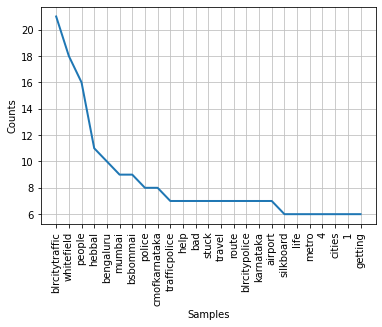

[('blrcitytraffic', 21), ('whitefield', 18), ('people', 16), ('hebbal', 11), ('bengaluru', 10), ('mumbai', 9), ('bsbommai', 9), ('police', 8), ('cmofkarnataka', 8), ('trafficpolice', 7), ('help', 7), ('bad', 7), ('stuck', 7), ('travel', 7), ('route', 7)]


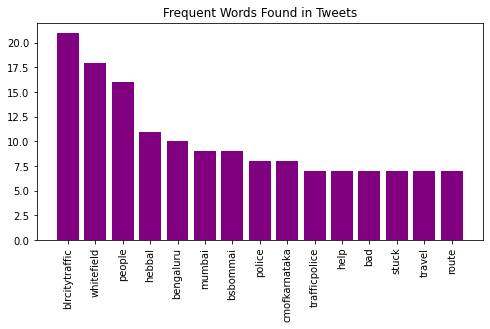

{'blrcitytraffic': 21, 'whitefield': 18, 'people': 16, 'hebbal': 11, 'bengaluru': 10, 'mumbai': 9, 'bsbommai': 9, 'police': 8, 'cmofkarnataka': 8, 'trafficpolice': 7, 'help': 7, 'bad': 7, 'stuck': 7, 'travel': 7, 'route': 7}


{'blrcitytraffic': 21,
 'whitefield': 18,
 'people': 16,
 'hebbal': 11,
 'bengaluru': 10,
 'mumbai': 9,
 'bsbommai': 9,
 'police': 8,
 'cmofkarnataka': 8,
 'trafficpolice': 7,
 'help': 7,
 'bad': 7,
 'stuck': 7,
 'travel': 7,
 'route': 7}

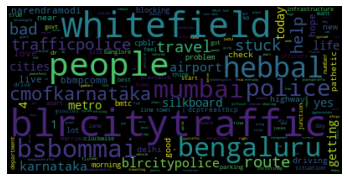

In [8]:
# Generate a Sentiment analysis and word cloud image

    # create Lexicon Dictionary
file = 'C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\AFINN-111.csv'
lexicon = build_lex_dict(file)

df_text = pd.read_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\tweets_on_silkboard_traffic.csv')
#df_text.head()

tweets_msg = df_text['Tweet'].values
#tweets

URL_wordcloud = Visualize_URL(tweets_msg)
#URL_wordcloud
URL_wordcloud

In [9]:
word_list = list(URL_wordcloud.items())
word_list

[('blrcitytraffic', 21),
 ('whitefield', 18),
 ('people', 16),
 ('hebbal', 11),
 ('bengaluru', 10),
 ('mumbai', 9),
 ('bsbommai', 9),
 ('police', 8),
 ('cmofkarnataka', 8),
 ('trafficpolice', 7),
 ('help', 7),
 ('bad', 7),
 ('stuck', 7),
 ('travel', 7),
 ('route', 7)]

In [10]:
# import psycopg2
# import sys

# def insert_freq_list(x):
#     sql = '''INSERT INTO "public"."wordfreqcount"("word","count") VALUES(%s,%s)'''
#     conn = psycopg2.connect(database="NRC_lex_capstone2", user='postgres', password='passme@123', host='127.0.0.1', port= '5432'
#         )
#     print(sql)
#     #Setting auto commit false
#     conn.autocommit = True
#     try:
#         cur = conn.cursor()
#         # execute the INSERT statement
#         cur.executemany(sql,x)
#         # commit the changes to the database
#         conn.commit()
#         # close communication with the database
#         cur.close()
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#     finally:
#         if conn is not None:
#             conn.close()

# if __name__ == '__main__':
#     insert_freq_list(word_list)


INSERT INTO "public"."wordfreqcount"("word","count") VALUES(%s,%s)


In [186]:
# emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
# emolex_words.head()

In [74]:
import os, re, csv, json, sys, string
import numpy as np
import pandas as pd
from collections import defaultdict, Counter

import gzip

from tqdm import tqdm

import pickle as pkl
from argparse import ArgumentParser
import logging

tqdm.pandas()

In [75]:
parser = ArgumentParser()
parser.add_argument('--dataPath', help='path to CSV data file with texts')
parser.add_argument('--lexPath', help='path to lexicon. CSV with columns "word" plus emotion columns')
parser.add_argument('--lexNames', nargs="*", type=str, help='Names of the lexicons/column names in the lexicon CSV')
parser.add_argument('--savePath', help='path to save folder')

_StoreAction(option_strings=['--dataPath'], dest='dataPath', nargs=None, const=None, default=None, type=None, choices=None, help='path to CSV data file with texts', metavar=None)

_StoreAction(option_strings=['--lexPath'], dest='lexPath', nargs=None, const=None, default=None, type=None, choices=None, help='path to lexicon. CSV with columns "word" plus emotion columns', metavar=None)

_StoreAction(option_strings=['--lexNames'], dest='lexNames', nargs='*', const=None, default=None, type=<class 'str'>, choices=None, help='Names of the lexicons/column names in the lexicon CSV', metavar=None)

_StoreAction(option_strings=['--savePath'], dest='savePath', nargs=None, const=None, default=None, type=None, choices=None, help='path to save folder', metavar=None)

In [76]:

def read_lexicon(path, LEXNAMES):
    df = pd.read_csv(path)
    df = df[~df['word'].isna()]
    df = df[['word']+LEXNAMES]
    df['word'] = [x.lower() for x in df['word']]
    return df
    # df = df[~df['val'].isna()]

def prep_dim_lexicon(df, dim):
    ldf = df[['word']+[dim]]
    ldf = ldf[~ldf[dim].isna()]
    ldf.drop_duplicates(subset=['word'], keep='first', inplace=True)
    ldf[dim] = [float(x) for x in ldf[dim]]
    ldf.rename({dim: 'val'}, axis='columns', inplace=True)
    ldf.set_index('word', inplace=True)
    return ldf

def get_alpha(token):
    return token.isalpha()


def get_vals(twt, lexdf):
    tt = twt.lower().split(" ")
    at = [w for w in tt if w.isalpha()]

    pw = [x for x in tt if x in lexdf.index]
    pv = [lexdf.loc[w]['val'] for w in pw]

    numTokens = len(at)
    numLexTokens = len(pw)
    
    avgLexVal = np.mean(pv)  #nan for 0 tokens
    return [numTokens, numLexTokens, avgLexVal]


def process_df(df, lexdf, LEXNAME):
    logging.info("Number of rows: " + str(len(df)))

    resrows = [get_vals(x, lexdf) for x in df['Tweet']]
    resrows = [x + y for x,y in zip(df.values.tolist(), resrows)]

    resdf = pd.DataFrame(resrows, columns=df.columns.tolist() + ['numTokens', 'numLexTokens', 'avgLexVal'])
    resdf['emotion'] = LEXNAME
    resdf = resdf[resdf['numLexTokens']>=1]
    resdf['lexRatio'] = resdf['numLexTokens']/resdf['numTokens']
    return resdf



In [77]:
def main(dataPath, LEXICON, LEXNAMES, savePath):

    os.makedirs(savePath, exist_ok=True)

    logfile = os.path.join(savePath, 'log.txt')

    logging.basicConfig(filename=logfile, format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO)
    
    df = pd.read_csv(dataPath)

    for LEXNAME in LEXNAMES:

        lexdf = prep_dim_lexicon(LEXICON, LEXNAME)
        lexdf.head(2)
        logging.info(LEXNAME + " lexicon length: " + str(len(lexdf)))
        resdf = process_df(df, lexdf, LEXNAME)
    
        resdf.to_csv(os.path.join(savePath, LEXNAME+'.csv'), index=False)

In [78]:
if __name__=='__main__':
    dataPath = 'C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\tweets_on_silkboard_traffic.csv'
    #lexPath = 'D:\\MBA\\Reva\\Enterprise_Analytics\\Emotion_recognition\\emolex.csv'
    #LEXNAMES = ['valence','dominance']
    lexPath = 'C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\NRC-Emotion-Lexicon.csv'
    LEXNAMES = ['positive','negative','anger','anticipation','disgust','fear','joy','sadness','surprise','trust']
    LEXICON = read_lexicon(lexPath, LEXNAMES)
    savePath = 'C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\output_emo'

    main(dataPath, LEXICON, LEXNAMES, savePath)


C:\Users\Surendra\AppData\Roaming\Python\Python38\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

C:\Users\Surendra\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



In [6]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd

import re
import os
import spacy
import en_core_web_sm
#nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [7]:
df = pd.read_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\tweets_on_silkboard_traffic.csv')
len(df)
df.drop_duplicates(inplace=True)
len(df)
df['Tweet_lc'] = df['Tweet'].str.lower()
tweets_msg = df['Tweet_lc'].values

254

254

In [8]:
#---------- emotions on total tweets

In [9]:
import json

def get_emolex(file='C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\NRC-Emotion-Lexicon.json'):
    f = open(file)
    j = json.load(f)
    f.close()
    return j
    
from collections import Counter

def emolex(text,lexicon):
    text = text.split()
    #print(text)
    
    total_word = len(text)
    
    emotions = {'anger':0,
                'anticipation':0,
                'disgust':0,
                'fear':0,
                'joy':0,
                'sadness':0,
                'surprise':0,
                'trust':0,
               'negative':0,
               'positive':0}
    words_with_emo = 0
    affect_list = []
    emotion_level = 0
    affect_frequencies = Counter()
    
    for word in text:
        if word in lexicon:
            words_with_emo+=1
            affect_list.append(word)
            for emo in lexicon[word]:
                emotion_level+=1
                emotions[emo]+=1

    return emotions, emotion_level, words_with_emo, total_word

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")

def normalize(text):
    #text = text.lower()
    text = text.replace('\n','')
    text = nlp(text)
    
    text = " ".join([token.lemma_ for token in text if not (
        token.is_stop or token.pos_ in ['PUNCT','advmod'])
                    ])
    
    return text

In [11]:
str_tweet = ','.join(df['Tweet_lc'])
text = normalize(str_tweet)
#text

In [12]:
emolexl = get_emolex()
emotions = emolex(text,emolexl)
emotions

({'anger': 62,
  'anticipation': 100,
  'disgust': 50,
  'fear': 108,
  'joy': 62,
  'sadness': 75,
  'surprise': 46,
  'trust': 130,
  'negative': 135,
  'positive': 215},
 983,
 437,
 2622)

In [13]:
emotions[0]
emotion_list = list(emotions[0].items())
emotion_list

{'anger': 62,
 'anticipation': 100,
 'disgust': 50,
 'fear': 108,
 'joy': 62,
 'sadness': 75,
 'surprise': 46,
 'trust': 130,
 'negative': 135,
 'positive': 215}

[('anger', 62),
 ('anticipation', 100),
 ('disgust', 50),
 ('fear', 108),
 ('joy', 62),
 ('sadness', 75),
 ('surprise', 46),
 ('trust', 130),
 ('negative', 135),
 ('positive', 215)]

In [19]:
emotion_list[:-2]

[('anger', 62),
 ('anticipation', 100),
 ('disgust', 50),
 ('fear', 108),
 ('joy', 62),
 ('sadness', 75),
 ('surprise', 46),
 ('trust', 130)]

In [20]:
# import psycopg2
# import sys

# def insert_nrc_emotions(x):
#     sql = '''INSERT INTO "public"."emotions"("emotion","count") VALUES(%s,%s)'''
#     conn = psycopg2.connect(database="NRC_lex_capstone2", user='postgres', password='passme@123', host='127.0.0.1', port= '5432'
#         )
#     print(sql)
#     #Setting auto commit false
#     conn.autocommit = True
#     try:
#         cur = conn.cursor()
#         # execute the INSERT statement
#         cur.executemany(sql,x)
#         # commit the changes to the database
#         conn.commit()
#         # close communication with the database
#         cur.close()
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#     finally:
#         if conn is not None:
#             conn.close()

# if __name__ == '__main__':
#     insert_nrc_emotions(emotion_list[:-2])

INSERT INTO "public"."emotions"("emotion","count") VALUES(%s,%s)


In [22]:
emotion_list
#emotion_class = dict(list(test_dict.items())[0: K])
emotion_class = dict(emotion_list[0: 8])
emotion_class

[('anger', 62),
 ('anticipation', 100),
 ('disgust', 50),
 ('fear', 108),
 ('joy', 62),
 ('sadness', 75),
 ('surprise', 46),
 ('trust', 130),
 ('negative', 135),
 ('positive', 215)]

{'anger': 62,
 'anticipation': 100,
 'disgust': 50,
 'fear': 108,
 'joy': 62,
 'sadness': 75,
 'surprise': 46,
 'trust': 130}

In [26]:
emotion_df = pd.DataFrame.from_dict(emotion_class, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Count'})
emotion_df = emotion_df.sort_values(by=['Emotion Count'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Count', y='Emotion Classification', color = 'Emotion Classification', orientation='h', width = 800, height = 400)
fig.show()

In [22]:
#text_object.load_token_list(list_of_tokens: list)


#Return words list.
#text_object.words


#Return sentences list.
#text_object.sentences


#Return affect list.
#text_object.affect_list


#Return affect dictionary.
#text_object.affect_dict


#Return raw emotional counts.
#text_object.raw_emotion_scores


#Return highest emotions.
#text_object.top_emotions


#Return affect frequencies.
#text_object.affect_frequencies

In [67]:
#pip install NRCLex
from nrclex import NRCLex
str_tweet = ','.join(df['Tweet'])
#text_object = NRCLex(str_tweet)
text = normalize(str_tweet)
text_object = NRCLex(text)

data = text_object.affect_frequencies

# sort based on keys
# emotion_freq_keys = sorted(data.keys())
# sorted_emotion_freq = {}
# for key in emotion_freq_keys:
#     sorted_emotion_freq[key] = data[key]

# sort based on values
sorted_emo_freq = dict(sorted(data.items(), key=lambda item:item[1]))

emo_freq_list = list(sorted_emo_freq.items())
emotion_frequency = dict(emo_freq_list[1: 9])

data
emotion_frequency

{'fear': 0.11275626423690205,
 'anger': 0.06719817767653759,
 'anticip': 0.0,
 'trust': 0.1275626423690205,
 'surprise': 0.0489749430523918,
 'positive': 0.2061503416856492,
 'negative': 0.14123006833712984,
 'sadness': 0.07972665148063782,
 'disgust': 0.05466970387243736,
 'joy': 0.06492027334851937,
 'anticipation': 0.09681093394077449}

{'surprise': 0.0489749430523918,
 'disgust': 0.05466970387243736,
 'joy': 0.06492027334851937,
 'anger': 0.06719817767653759,
 'sadness': 0.07972665148063782,
 'anticipation': 0.09681093394077449,
 'fear': 0.11275626423690205,
 'trust': 0.1275626423690205}

In [70]:
emotion_df = pd.DataFrame.from_dict(emotion_frequency, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion Classification' , 0: 'Emotion Frequency'})
emotion_df = emotion_df.sort_values(by=['Emotion Frequency'], ascending=True)
import plotly.express as px
fig = px.bar(emotion_df, x='Emotion Frequency', y='Emotion Classification', color = 'Emotion Frequency', 
             orientation='h', width = 800, height = 400,  color_continuous_scale='rainbow')
fig.show()

In [73]:
# import psycopg2
# import sys

# def insert_nrc_emotions(x):
#     sql = '''INSERT INTO "public"."emotions_freq"("emotion","frequency") VALUES(%s,%s)'''
#     conn = psycopg2.connect(database="NRC_lex_capstone2", user='postgres', password='passme@123', host='127.0.0.1', port= '5432'
#         )
#     print(sql)
#     #Setting auto commit false
#     conn.autocommit = True
#     try:
#         cur = conn.cursor()
#         # execute the INSERT statement
#         cur.executemany(sql,x)
#         # commit the changes to the database
#         conn.commit()
#         # close communication with the database
#         cur.close()
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#     finally:
#         if conn is not None:
#             conn.close()

# if __name__ == '__main__':
#     insert_nrc_emotions(emo_freq_list[1:-2])


INSERT INTO "public"."emotions_freq"("emotion","frequency") VALUES(%s,%s)


In [26]:
#Return highest emotions.
text_object.top_emotions

[('positive', 0.20817843866171004)]

In [3]:
from nrclex import NRCLex

In [4]:
from string import punctuation
stopwordss = stopwords.words('english')
stopwordss+=punctuation+','+'.'

In [6]:
# nltk
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag,word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [7]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [8]:
df = pd.read_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\tweets_on_silkboard_traffic.csv')
len(df)
df.drop_duplicates(inplace=True)
len(df)
df['Tweet_lc'] = df['Tweet'].str.lower()
tweets_msg = df['Tweet_lc'].values

254

254

In [10]:
df.shape[0]

254

In [12]:
tweets = []
for i in range(df.shape[0]):
    tweet = ''
    tw = df['Tweet_lc'][i]
    for j in range(len(tw)):
        det_rev = tw[j]['review_body']
        for word in det_rev.strip().split(' '):
            if word.lower() not in stopwordss and (len(word)>3):
                pos = pos_tag([word])
                clean_word = lemmatizer.lemmatize(word,pos=get_simple_pos(pos[0][1]))
                tweet += ' ' + clean_word.replace('.','').replace(',','').replace('"','').replace('”','').lower()
    tweets.append(tweet)

In [15]:
# import nltk
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Surendra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [16]:
tweets = []
for i in range(df.shape[0]):
    tweet = ''
    tw = df['Tweet_lc'][i]
    for word in tw.strip().split(' '):
        if word.lower() not in stopwordss and (len(word)>3):
            pos = pos_tag([word])
            clean_word = lemmatizer.lemmatize(word,pos=get_simple_pos(pos[0][1]))
            tweet += ' ' + clean_word.replace('.','').replace(',','').replace('"','').replace('”','').lower()
    tweets.append(tweet)

In [17]:
tweets

[' silkboard traffic death',
 ' capital traffic bangalore silk board miss reel strongly condemn baava silkboard',
 ' suryapsingh32 satishacharya traffic first talk hyderabad cross entire telangana',
 ' always crack silkboard traffic joke never live city call mumbai',
 ' bangalore richer average traffic police',
 ' vandanajain precisely bangalore people would caught dead move find',
 ' need help narendramodi pmoindia bangalore commissioner police bangalore traffic commissioner police',
 ' vinodblru rajdugar dyamannavar anil lulla swrrly southernrailway christinmp captsanthoshkc',
 ' bangaloretrafficpolice bangaloretraffic bangalore place entry sign either place high hidd',
 ' return back bangalore post week live project stint mobility issue beyond',
 ' bangaloremirror intresting hope implement ground responsibly hope bangalore traffic officer rise',
 ' bangalore without long traffic heaven',
 ' actually road high bangalore bad road also bangalore father die',
 ' rapido anna discuss stoc

In [157]:
list_of_dictionary_of_emotions = []
for i in tweets:
    # emotion recognition
    text_object = NRCLex(i)
    dictionary_of_emotions = text_object.affect_frequencies
    #print(dictionary_of_emotions)
    dictionary_of_emotions['tweet'] = i
    #print(dictionary_of_emotions)
    list_of_dictionary_of_emotions.append(dictionary_of_emotions)
df_emo_freq = pd.DataFrame(list_of_dictionary_of_emotions)
df_emo_freq

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,tweet
0,0.142857,0.142857,0.0,0.000000,0.142857,0.000000,0.142857,0.142857,0.142857,0.000000,0.142857,silkboard traffic death
1,0.000000,0.200000,0.0,0.000000,0.000000,0.400000,0.200000,0.000000,0.000000,0.000000,0.200000,capital traffic bangalore silk board miss ree...
2,0.200000,0.200000,0.0,0.000000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,NaN,suryapsingh32 satishacharya traffic first tal...
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,always crack silkboard traffic joke never liv...
4,0.333333,0.000000,0.0,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,NaN,bangalore richer average traffic police
...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,mybangalore blrcitytraffic anil lulla hebbalt...
250,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,update traffic signal flash whitefield yyctra...
251,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,alert traffic incident whitefield block right...
252,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,NaN,17092022 come wrong direction 0669 september ...


In [158]:
df_emo_freq.drop(columns = ['positive','negative','anticip'], inplace = True)

In [159]:
df_emo_freq

,fear,anger,trust,surprise,sadness,disgust,joy,anticipation,tweet
0,0.142857,0.142857,0.000000,0.142857,0.142857,0.142857,0.000000,0.142857,silkboard traffic death
1,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,capital traffic bangalore silk board miss ree...
2,0.200000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,NaN,suryapsingh32 satishacharya traffic first tal...
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,always crack silkboard traffic joke never liv...
4,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,NaN,bangalore richer average traffic police
...,...,...,...,...,...,...,...,...,...
249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,mybangalore blrcitytraffic anil lulla hebbalt...
250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,update traffic signal flash whitefield yyctra...
251,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,alert traffic incident whitefield block right...
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,17092022 come wrong direction 0669 september ...


In [160]:
df_emo_freq.shape

(254, 9)

In [161]:
df_emo_freq.columns

Index(['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy',
       'anticipation', 'tweet'],
      dtype='object')

In [162]:
maxValues = df_emo_freq.max(axis=1)
print(maxValues)

0      0.142857
1      0.200000
2      0.200000
3      0.000000
4      0.333333
         ...   
249    0.000000
250    0.000000
251    1.000000
252    0.000000
253    0.250000
Length: 254, dtype: float64


In [165]:
df_emo_freq_new = df_emo_freq[['tweet']].copy()
df_emo_freq_new

,tweet
0,silkboard traffic death
1,capital traffic bangalore silk board miss ree...
2,suryapsingh32 satishacharya traffic first tal...
3,always crack silkboard traffic joke never liv...
4,bangalore richer average traffic police
...,...
249,mybangalore blrcitytraffic anil lulla hebbalt...
250,update traffic signal flash whitefield yyctra...
251,alert traffic incident whitefield block right...
252,17092022 come wrong direction 0669 september ...


In [167]:
df_emo_freq.drop(columns = ['tweet'], inplace = True)

In [168]:
maxValues = df_emo_freq.astype(float).idxmax(axis=1)
print(maxValues)
df_emo_freq['Emotion'] = pd.DataFrame(maxValues)
df_emo_freq

0          fear
1         anger
2          fear
3          fear
4          fear
         ...   
249        fear
250        fear
251    surprise
252        fear
253       trust
Length: 254, dtype: object


,fear,anger,trust,surprise,sadness,disgust,joy,anticipation,Emotion
0,0.142857,0.142857,0.000000,0.142857,0.142857,0.142857,0.000000,0.142857,fear
1,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,anger
2,0.200000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,NaN,fear
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,fear
4,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,NaN,fear
...,...,...,...,...,...,...,...,...,...
249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,fear
250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,fear
251,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,surprise
252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,fear


In [169]:
df_emo_freq_new['Emotion'] = df_emo_freq[['Emotion']].copy()
df_emo_freq_new['tweet'] =  df_emo_freq_new['tweet'].str.lstrip()
df_emo_freq_new

,tweet,Emotion
0,silkboard traffic death,fear
1,capital traffic bangalore silk board miss reel...,anger
2,suryapsingh32 satishacharya traffic first talk...,fear
3,always crack silkboard traffic joke never live...,fear
4,bangalore richer average traffic police,fear
...,...,...
249,mybangalore blrcitytraffic anil lulla hebbaltr...,fear
250,update traffic signal flash whitefield yyctraf...,fear
251,alert traffic incident whitefield block right ...,surprise
252,17092022 come wrong direction 0669 september 2...,fear


In [170]:
df_emo_freq_new.to_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\Tweet_Emotion_label.csv', index= False)

In [139]:
df_emo_freq_new.groupby('Emotion').count()
emotions = df_emo_freq_new['Emotion'].value_counts()
emotions

,tweet
Emotion,
anger,13
anticipation,18
disgust,5
fear,153
joy,4
sadness,5
surprise,6
trust,50


fear            153
trust            50
anticipation     18
anger            13
surprise          6
disgust           5
sadness           5
joy               4
Name: Emotion, dtype: int64

In [150]:
emo_freq = pd.Series(df_emo_freq_new['Emotion'].value_counts()).to_dict()
#emo_freq.sort_values()[-10:].plot(kind = 'barh')
emotion_df = pd.DataFrame.from_dict(emo_freq, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion in Tweet' , 0: 'No. of Tweets'})
emotion_df = emotion_df.sort_values(by=['No. of Tweets'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='No. of Tweets', y='Emotion in Tweet', color = 'Emotion in Tweet', orientation='h', width = 800, height = 400)
fig.show()

In [177]:
all_emo_df = pd.read_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\output_emo\\all_emotions.csv')

In [179]:
all_emo_df.columns

Index(['Tweet', 'numTokens', 'numLexTokens', 'lexRatio', 'avgLexVal_trust',
       'emotion_trust', 'avgLexVal_anticipation', 'emotion_anticipation',
       'avgLexVal_anger', 'emotion_anger', 'avgLexVal_disgust',
       'emotion_disgust', 'avgLexVal_fear', 'emotion_fear', 'avgLexVal_joy',
       'emotion_joy', 'avgLexVal_surprise', 'emotion_surprise',
       'avgLexVal_sadness', 'emotion_sadness'],
      dtype='object')

In [180]:
all_emo_df_new = all_emo_df.drop(columns=['Tweet', 'numTokens', 'numLexTokens', 'lexRatio', 'emotion_trust',
                                          'emotion_anticipation','emotion_anger', 'emotion_disgust', 'emotion_fear',
                                          'emotion_joy', 'emotion_surprise', 'emotion_sadness'])

In [181]:
maxValues = all_emo_df_new.astype(float).idxmax(axis=1)
print(maxValues)

0      avgLexVal_anticipation
1      avgLexVal_anticipation
2             avgLexVal_anger
3             avgLexVal_trust
4             avgLexVal_trust
                ...          
241           avgLexVal_trust
242           avgLexVal_trust
243        avgLexVal_surprise
244    avgLexVal_anticipation
245           avgLexVal_trust
Length: 246, dtype: object


In [189]:
all_emo_df_new_1 = pd.DataFrame(maxValues, columns=['Emotion'])
all_emo_df_new_2 = pd.DataFrame()
all_emo_df_new_2
all_emo_df_new_2[['avg_lex_val','Emotion']] = all_emo_df_new_1['Emotion'].str.split('_', expand=True)
all_emo_df_new_2

""


,avg_lex_val,Emotion
0,avgLexVal,anticipation
1,avgLexVal,anticipation
2,avgLexVal,anger
3,avgLexVal,trust
4,avgLexVal,trust
...,...,...
241,avgLexVal,trust
242,avgLexVal,trust
243,avgLexVal,surprise
244,avgLexVal,anticipation


In [190]:
all_emo_df['Emotion'] = all_emo_df_new_2[['Emotion']].copy()

,Tweet,numTokens,numLexTokens,lexRatio,avgLexVal_trust,emotion_trust,avgLexVal_anticipation,emotion_anticipation,avgLexVal_anger,emotion_anger,...,emotion_disgust,avgLexVal_fear,emotion_fear,avgLexVal_joy,emotion_joy,avgLexVal_surprise,emotion_surprise,avgLexVal_sadness,emotion_sadness,Emotion
0,silkboard traffic will be the death of me,8,2,0.250000,0.000000,trust,0.500000,anticipation,0.500000,anger,...,disgust,0.500000,fear,0.00,joy,0.50,surprise,0.50,sadness,anticipation
1,The capital of traffic in Bangalore Silk Board...,19,6,0.315789,0.000000,trust,0.166667,anticipation,0.166667,anger,...,disgust,0.000000,fear,0.00,joy,0.00,surprise,0.00,sadness,anticipation
2,Suryapsingh32 satishacharya Fix your traffic f...,14,4,0.285714,0.000000,trust,0.000000,anticipation,0.250000,anger,...,disgust,0.250000,fear,0.00,joy,0.00,surprise,0.25,sadness,anger
3,Those who always crack silkboard traffic jokes...,15,3,0.200000,0.000000,trust,0.000000,anticipation,0.000000,anger,...,disgust,0.000000,fear,0.00,joy,0.00,surprise,0.00,sadness,trust
4,In Bangalore who is richer than CEO The averag...,11,3,0.272727,0.333333,trust,0.000000,anticipation,0.000000,anger,...,disgust,0.333333,fear,0.00,joy,0.00,surprise,0.00,sadness,trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,mybangalore blrcitytraffic NGR blr anil lulla ...,13,2,0.153846,0.000000,trust,0.000000,anticipation,0.000000,anger,...,disgust,0.000000,fear,0.00,joy,0.00,surprise,0.00,sadness,trust
242,UPDATE Traffic signals are flashing red on 36 ...,14,3,0.214286,0.000000,trust,0.000000,anticipation,0.000000,anger,...,disgust,0.000000,fear,0.00,joy,0.00,surprise,0.00,sadness,trust
243,ALERT Traffic incident on 36 St and Whitefield...,15,4,0.266667,0.000000,trust,0.000000,anticipation,0.000000,anger,...,disgust,0.000000,fear,0.00,joy,0.25,surprise,0.00,sadness,surprise
244,TW 004 17092022 Coming in wrong direction KA 0...,14,5,0.357143,0.000000,trust,0.200000,anticipation,0.000000,anger,...,disgust,0.000000,fear,0.00,joy,0.00,surprise,0.00,sadness,anticipation


In [192]:
all_emo_df_final = pd.DataFrame(all_emo_df, columns=['Tweet','Emotion'])
all_emo_df_final.to_csv('C:\\Users\\Surendra\\OneDrive\\Desktop\\Capstone\\Capstone_2\\Tweet_Emotion_label_first.csv', index= False)

In [195]:
all_emo_df_final.groupby('Emotion').count()
emotions = all_emo_df_final['Emotion'].value_counts()
emotions

,Tweet
Emotion,
anger,21
anticipation,38
disgust,5
fear,14
joy,2
sadness,3
surprise,4
trust,159


trust           159
anticipation     38
anger            21
fear             14
disgust           5
surprise          4
sadness           3
joy               2
Name: Emotion, dtype: int64

In [197]:
emo_freq = pd.Series(all_emo_df_final['Emotion'].value_counts()).to_dict()
#emo_freq.sort_values()[-10:].plot(kind = 'barh')
emotion_df = pd.DataFrame.from_dict(emo_freq, orient='index')
emotion_df = emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={'index' : 'Emotion in Tweet' , 0: 'No. of Tweets'})
emotion_df = emotion_df.sort_values(by=['No. of Tweets'], ascending=False)
import plotly.express as px
fig = px.bar(emotion_df, x='No. of Tweets', y='Emotion in Tweet', color = 'Emotion in Tweet', orientation='h', width = 800, height = 400)
fig.show()